## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [134]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4279,5233,Club Penguin Island,FAMILY,2.8,107441,32M,"1,000,000+",Free,0,Everyone,Casual;Action & Adventure,"July 10, 2018",1.10.5,4.4 and up
6447,7496,Camera V7 24 Megapixel,PHOTOGRAPHY,4.0,2480,2.5M,"100,000+",Free,0,Everyone,Photography,"August 1, 2018",4.0,4.1 and up
5055,6048,BD Internet Package Activator,NEWS_AND_MAGAZINES,4.9,13,2.3M,100+,Free,0,Everyone,News & Magazines,"March 9, 2018",1.2,4.0.3 and up
1853,2352,Mayo Clinic,MEDICAL,4.3,2218,NaN,"500,000+",Free,0,Everyone,Medical,"August 1, 2018",Varies with device,Varies with device
9145,10316,EMI Calculator | FD Calculator | RD calculator,FINANCE,4.6,106,4.4M,"10,000+",Free,0,Everyone,Finance,"March 19, 2018",5.3,4.0.3 and up


## 2. Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.</p>

In [136]:
# List of characters to remove
chars_to_remove = [',','$','+','M']
# List of column names to clean
cols_to_clean = ['Installs','Size','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

In [138]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>From our research, we found that the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

In [140]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>
<p>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.</p>

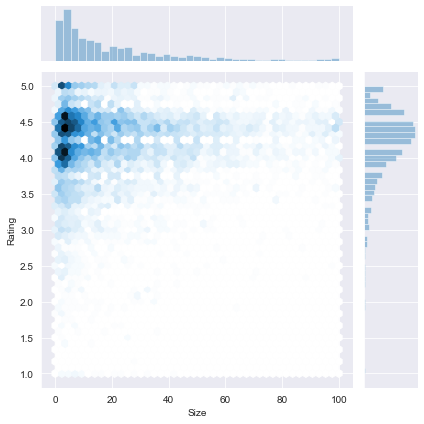

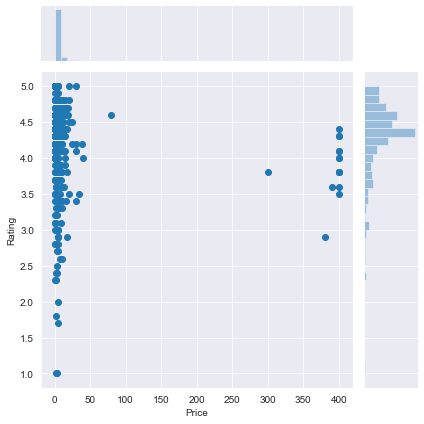

In [142]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Plot size vs. rating
plt1 = sns.jointplot(x = apps['Size'], y = apps['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


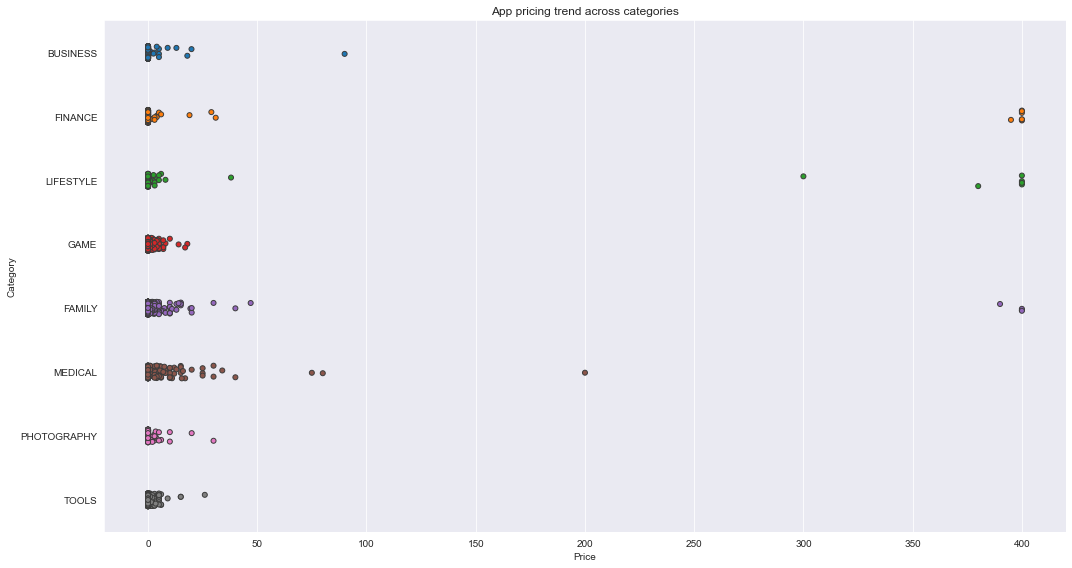

In [144]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization. The distribution of apps under \$20 becomes clearer.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

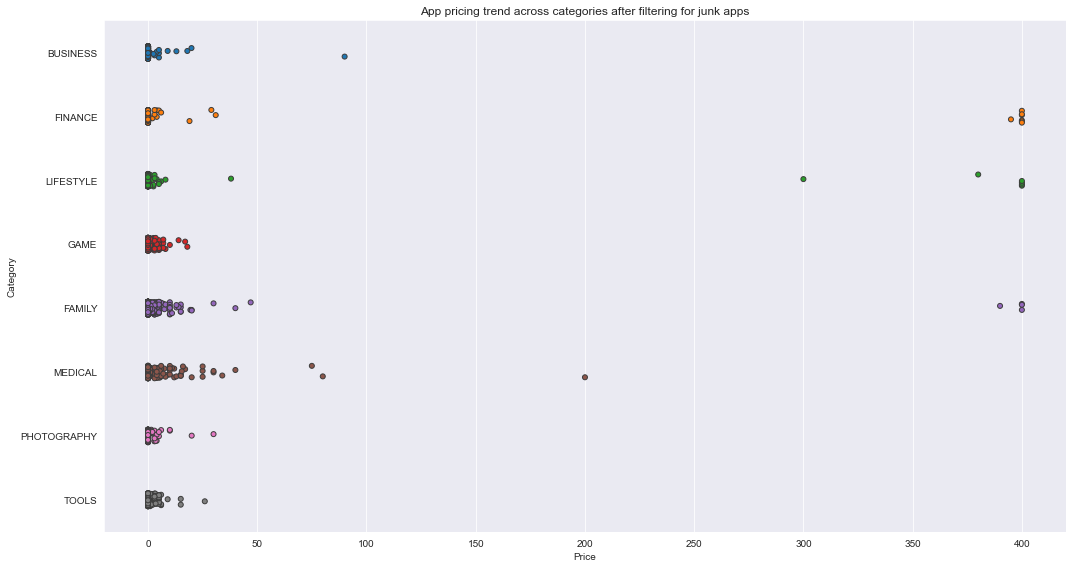

In [146]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!</p>

In [148]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>
<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.</p>

In [150]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = apps, how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x ='Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

KeyError:       Unnamed: 0                                                App  \
0              0     Photo Editor & Candy Camera & Grid & ScrapBook   
1              1                                Coloring book moana   
2              2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3              3                              Sketch - Draw & Paint   
4              4              Pixel Draw - Number Art Coloring Book   
5              5                         Paper flowers instructions   
6              6            Smoke Effect Photo Maker - Smoke Editor   
7              7                                   Infinite Painter   
8              8                               Garden Coloring Book   
9              9                      Kids Paint Free - Drawing Fun   
10            10                            Text on Photo - Fonteee   
11            11            Name Art Photo Editor - Focus n Filters   
12            12                     Tattoo Name On My Photo Editor   
13            13                              Mandala Coloring Book   
14            14    3D Color Pixel by Number - Sandbox Art Coloring   
15            15                    Learn To Draw Kawaii Characters   
16            16       Photo Designer - Write your name with shapes   
17            17                           350 Diy Room Decor Ideas   
18            18                      FlipaClip - Cartoon animation   
19            19                                       ibis Paint X   
20            20                        Logo Maker - Small Business   
21            21          Boys Photo Editor - Six Pack & Men's Suit   
22            22            Superheroes Wallpapers | 4K Backgrounds   
23            23                             Mcqueen Coloring pages   
24            24                        HD Mickey Minnie Wallpapers   
25            25                         Harley Quinn wallpapers HD   
26            26                      Colorfit - Drawing & Coloring   
27            27                              Animated Photo Editor   
28            28                              Pencil Sketch Drawing   
29            29                    Easy Realistic Drawing Tutorial   
...          ...                                                ...   
9629       10811                                        FR Plus 1.6   
9630       10812                                      Fr Agnel Pune   
9631       10813                                     DICT.fr Mobile   
9632       10814                               FR: My Secret Pets!    
9633       10815                          Golden Dictionary (FR-AR)   
9634       10816                                 FieldBi FR Offline   
9635       10817                               HTC Sense Input - FR   
9636       10818                               Gold Quote - Gold.fr   
9637       10819                                          Fanfic-FR   
9638       10820                                    Fr. Daoud Lamei   
9639       10821                                            Poop FR   
9640       10822                                          PLMGSS FR   
9641       10823                                       List iptv FR   
9642       10824                                          Cardio-FR   
9643       10825                                 Naruto & Boruto FR   
9644       10826          Frim: get new friends on local chat rooms   
9645       10827                                 Fr Agnel Ambarnath   
9646       10828                            Manga-FR - Anime Vostfr   
9647       10829                     Bulgarian French Dictionary Fr   
9648       10830                                  News Minecraft.fr   
9649       10831                           payermonstationnement.fr   
9650       10832                                           FR Tides   
9651       10833                                        Chemin (fr)   
9652       10834                                      FR Calculator   
9653       10835                                           FR Forms   
9654       10836                                   Sya9a Maroc - FR   
9655       10837                   Fr. Mike Schmitz Audio Teachings   
9656       10838                             Parkinson Exercices FR   
9657       10839                      The SCP Foundation DB fr nn5n   
9658       10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews    Size  Installs  Type  Price  \
0          ART_AND_DESIGN     4.1      159  19.000     10000  Free    0.0   
1          ART_AND_DESIGN     3.9      967  14.000    500000  Free    0.0   
2          ART_AND_DESIGN     4.7    87510   8.700   5000000  Free    0.0   
3          ART_AND_DESIGN     4.5   215644  25.000  50000000  Free    0.0   
4          ART_AND_DESIGN     4.3      967   2.800    100000  Free    0.0   
5          ART_AND_DESIGN     4.4      167   5.600     50000  Free    0.0   
6          ART_AND_DESIGN     3.8      178  19.000     50000  Free    0.0   
7          ART_AND_DESIGN     4.1    36815  29.000   1000000  Free    0.0   
8          ART_AND_DESIGN     4.4    13791  33.000   1000000  Free    0.0   
9          ART_AND_DESIGN     4.7      121   3.100     10000  Free    0.0   
10         ART_AND_DESIGN     4.4    13880  28.000   1000000  Free    0.0   
11         ART_AND_DESIGN     4.4     8788  12.000   1000000  Free    0.0   
12         ART_AND_DESIGN     4.2    44829  20.000  10000000  Free    0.0   
13         ART_AND_DESIGN     4.6     4326  21.000    100000  Free    0.0   
14         ART_AND_DESIGN     4.4     1518  37.000    100000  Free    0.0   
15         ART_AND_DESIGN     3.2       55   2.700      5000  Free    0.0   
16         ART_AND_DESIGN     4.7     3632   5.500    500000  Free    0.0   
17         ART_AND_DESIGN     4.5       27  17.000     10000  Free    0.0   
18         ART_AND_DESIGN     4.3   194216  39.000   5000000  Free    0.0   
19         ART_AND_DESIGN     4.6   224399  31.000  10000000  Free    0.0   
20         ART_AND_DESIGN     4.0      450  14.000    100000  Free    0.0   
21         ART_AND_DESIGN     4.1      654  12.000    100000  Free    0.0   
22         ART_AND_DESIGN     4.7     7699   4.200    500000  Free    0.0   
23         ART_AND_DESIGN     NaN       61   7.000    100000  Free    0.0   
24         ART_AND_DESIGN     4.7      118  23.000     50000  Free    0.0   
25         ART_AND_DESIGN     4.8      192   6.000     10000  Free    0.0   
26         ART_AND_DESIGN     4.7    20260  25.000    500000  Free    0.0   
27         ART_AND_DESIGN     4.1      203   6.100    100000  Free    0.0   
28         ART_AND_DESIGN     3.9      136   4.600     10000  Free    0.0   
29         ART_AND_DESIGN     4.1      223   4.200    100000  Free    0.0   
...                   ...     ...      ...     ...       ...   ...    ...   
9629    AUTO_AND_VEHICLES     NaN        4   3.900       100  Free    0.0   
9630               FAMILY     4.1       80  13.000      1000  Free    0.0   
9631             BUSINESS     NaN       20   2.700     10000  Free    0.0   
9632               FAMILY     4.0      785  31.000     50000  Free    0.0   
9633  BOOKS_AND_REFERENCE     4.2     5775   4.900    500000  Free    0.0   
9634             BUSINESS     NaN        2   6.800       100  Free    0.0   
9635                TOOLS     4.0      885   8.000    100000  Free    0.0   
9636              FINANCE     NaN       96   1.500     10000  Free    0.0   
9637  BOOKS_AND_REFERENCE     3.3       52   3.600      5000  Free    0.0   
9638               FAMILY     5.0       22   8.600      1000  Free    0.0   
9639               FAMILY     NaN        6   2.500        50  Free    0.0   
9640         PRODUCTIVITY     NaN        0   3.100        10  Free    0.0   
9641        VIDEO_PLAYERS     NaN        1   2.900       100  Free    0.0   
9642              MEDICAL     NaN       67  82.000     10000  Free    0.0   
9643               SOCIAL     NaN        7   7.700       100  Free    0.0   
9644               SOCIAL     4.0    88486     NaN   5000000  Free    0.0   
9645               FAMILY     4.2      117  13.000      5000  Free    0.0   
9646               COMICS     3.4      291  13.000     10000  Free    0.0   
9647  BOOKS_AND_REFERENCE     4.6      603   7.400     10000  Free    0.0   
9648   NEWS_AND_MAGAZINES     3.8      881   2.300    100000  Free    0.0   
9649  MAPS_AND_NAVIGATION     NaN       38   9.800      5000  Free    0.0   
9650              WEATHER     3.8     1195   0.582    100000  Free    0.0   
9651  BOOKS_AND_REFERENCE     4.8       44   0.619      1000  Free    0.0   
9652               FAMILY     4.0        7   2.600       500  Free    0.0   
9653             BUSINESS     NaN        0   9.600        10  Free    0.0   
9654               FAMILY     4.5       38  53.000      5000  Free    0.0   
9655               FAMILY     5.0        4   3.600       100  Free    0.0   
9656              MEDICAL     NaN        3   9.500      1000  Free    0.0   
9657  BOOKS_AND_REFERENCE     4.5      114     NaN      1000  Free    0.0   
9658            LIFESTYLE     4.5   398307  19.000  10000000  Free    0.0   

     Content Rating                           Genres        Last Updated  \
0          Everyone                     Art & Design     January 7, 2018   
1          Everyone        Art & Design;Pretend Play    January 15, 2018   
2          Everyone                     Art & Design      August 1, 2018   
3              Teen                     Art & Design        June 8, 2018   
4          Everyone          Art & Design;Creativity       June 20, 2018   
5          Everyone                     Art & Design      March 26, 2017   
6          Everyone                     Art & Design      April 26, 2018   
7          Everyone                     Art & Design       June 14, 2018   
8          Everyone                     Art & Design  September 20, 2017   
9          Everyone          Art & Design;Creativity        July 3, 2018   
10         Everyone                     Art & Design    October 27, 2017   
11         Everyone                     Art & Design       July 31, 2018   
12             Teen                     Art & Design       April 2, 2018   
13         Everyone                     Art & Design       June 26, 2018   
14         Everyone                     Art & Design      August 3, 2018   
15         Everyone                     Art & Design        June 6, 2018   
16         Everyone                     Art & Design       July 31, 2018   
17         Everyone                     Art & Design    November 7, 2017   
18         Everyone                     Art & Design      August 3, 2018   
19         Everyone                     Art & Design       July 30, 2018   
20         Everyone                     Art & Design      April 20, 2018   
21         Everyone                     Art & Design      March 20, 2018   
22     Everyone 10+                     Art & Design       July 12, 2018   
23         Everyone  Art & Design;Action & Adventure       March 7, 2018   
24         Everyone                     Art & Design        July 7, 2018   
25         Everyone                     Art & Design      April 25, 2018   
26         Everyone          Art & Design;Creativity    October 11, 2017   
27         Everyone                     Art & Design      March 21, 2018   
28         Everyone                     Art & Design       July 12, 2018   
29         Everyone                     Art & Design     August 22, 2017   
...             ...                              ...                 ...   
9629       Everyone                  Auto & Vehicles       July 24, 2018   
9630       Everyone                        Education       June 13, 2018   
9631       Everyone                         Business       July 17, 2018   
9632           Teen                    Entertainment        June 3, 2015   
9633       Everyone                Books & Reference       July 19, 2018   
9634       Everyone                         Business      August 6, 2018   
9635       Everyone                            Tools    October 30, 2015   
9636       Everyone                          Finance        May 19, 2016   
9637           Teen                Books & Reference      August 5, 2017   
9638           Teen                        Education       June 27, 2018   
9639       Everyone                    Entertainment        May 29, 2018   
9640       Everyone                     Productivity    December 1, 2017   
9641       Everyone          Video Players & Editors      April 22, 2018   
9642       Everyone                          Medical       July 31, 2018   
9643           Teen                           Social    February 2, 2018   
9644     Mature 17+                           Social      March 23, 2018   
9645       Everyone                        Education       June 13, 2018   
9646       Everyone                           Comics        May 15, 2017   
9647       Everyone                Books & Reference       June 19, 2016   
9648       Everyone                 News & Magazines    January 20, 2014   
9649       Everyone                Maps & Navigation       June 13, 2018   
9650       Everyone                          Weather   February 16, 2014   
9651       Everyone                Books & Reference      March 23, 2014   
9652       Everyone                        Education       June 18, 2017   
9653       Everyone                         Business  September 29, 2016   
9654       Everyone                        Education       July 25, 2017   
9655       Everyone                        Education        July 6, 2018   
9656       Everyone                          Medical    January 20, 2017   
9657     Mature 17+                Books & Reference    January 19, 2015   
9658       Everyone                        Lifestyle       July 25, 2018   

             Current Ver         Android Ver  
0                  1.0.0        4.0.3 and up  
1                  2.0.0        4.0.3 and up  
2                  1.2.4        4.0.3 and up  
3     Varies with device          4.2 and up  
4                    1.1          4.4 and up  
5                    1.0          2.3 and up  
6                    1.1        4.0.3 and up  
7               6.1.61.1          4.2 and up  
8                  2.9.2          3.0 and up  
9                    2.8        4.0.3 and up  
10                 1.0.4          4.1 and up  
11                1.0.15          4.0 and up  
12                   3.8          4.1 and up  
13                 1.0.4          4.4 and up  
14                 1.2.3          2.3 and up  
15                   NaN          4.2 and up  
16                   3.1          4.1 and up  
17                   1.0          2.3 and up  
18                 2.2.5        4.0.3 and up  
19                 5.5.4          4.1 and up  
20                   4.0          4.1 and up  
21                   1.1        4.0.3 and up  
22               2.2.6.2        4.0.3 and up  
23                 1.0.0          4.1 and up  
24                 1.1.3          4.1 and up  
25                   1.5          3.0 and up  
26                 1.0.8        4.0.3 and up  
27                  1.03        4.0.3 and up  
28                   6.0          2.3 and up  
29                   1.0          2.3 and up  
...                  ...                 ...  
9629               1.3.6         4.4W and up  
9630              2.0.20        4.0.3 and up  
9631              2.1.10          4.1 and up  
9632               1.3.1          3.0 and up  
9633             7.0.4.6          4.2 and up  
9634               2.1.8          4.1 and up  
9635          1.0.612928          5.0 and up  
9636                 2.3          2.2 and up  
9637               0.3.4          4.1 and up  
9638               3.8.0          4.1 and up  
9639                 1.0        4.0.3 and up  
9640                   1          4.4 and up  
9641                 1.0        4.0.3 and up  
9642               2.2.2          4.4 and up  
9643                 1.0          4.0 and up  
9644  Varies with device  Varies with device  
9645              2.0.20        4.0.3 and up  
9646               2.0.1          4.0 and up  
9647                2.96          4.1 and up  
9648                 1.5          1.6 and up  
9649           2.0.148.0          4.0 and up  
9650                 6.0          2.1 and up  
9651                 0.8          2.2 and up  
9652               1.0.0          4.1 and up  
9653               1.1.5          4.0 and up  
9654                1.48          4.1 and up  
9655                 1.0          4.1 and up  
9656                 1.0          2.2 and up  
9657  Varies with device  Varies with device  
9658  Varies with device  Varies with device  

[9659 rows x 14 columns]